In [9]:
#Since we have already saved the numeric 
#dataset from running pca in python lets
#just run this to make sure everyhting's working correctly
train <- read.csv("train_cleaned.csv")
df <- read.csv("numeric_forpca.csv")


# Principal Component Analysis

Importance of components%s:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2708 1.34414 1.29383 1.07519 1.06288 1.04095 1.02492
Proportion of Variance 0.2344 0.08212 0.07609 0.05255 0.05135 0.04925 0.04775
Cumulative Proportion  0.2344 0.31652 0.39261 0.44516 0.49651 0.54576 0.59351
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.0147 0.99891 0.96629 0.94701 0.93634 0.89907 0.86645
Proportion of Variance 0.0468 0.04536 0.04244 0.04076 0.03985 0.03674 0.03412
Cumulative Proportion  0.6403 0.68566 0.72811 0.76887 0.80872 0.84546 0.87959
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.82649 0.78774 0.72603 0.56248 0.54785 0.44922
Proportion of Variance 0.03105 0.02821 0.02396 0.01438 0.01364 0.00917
Cumulative Proportion  0.91064 0.93884 0.96280 0.97718 0.99083 1.00000
                            PC21      PC22
Standard deviation   

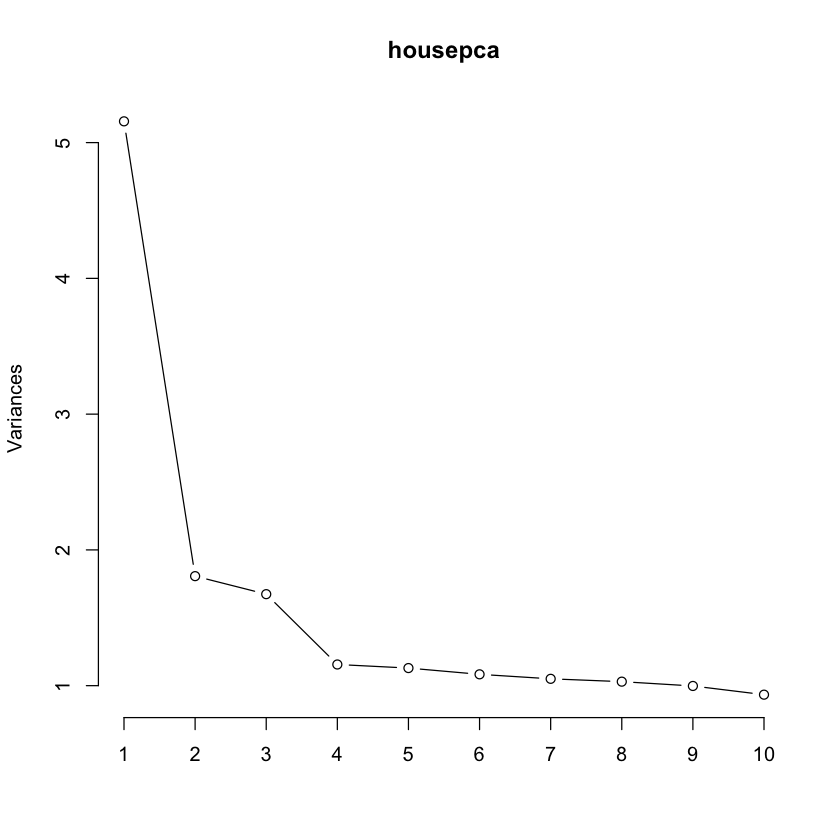

In [10]:
#So we have 23 princpial components 
housepca <- prcomp(df, scale.=TRUE)
summary(housepca)


# And as mentioned in the ipython notebook 
# we retain 90% of the variability with 15 principal components 
# but apparently the scree plot tells us that we should probably pick 4 principal components since that's where the elbow is

plot(housepca, type="lines") 

# But if we were to use the Kaiser criterion we would only keep up to 8 components 
# So different from the 90% variablity we discussed in the notebbook we will 
# take the averaage amount of principal componets from the different decision methods 
# so lets take 8 predicotors explaing 64% of the variability



# Loading Interpretation

In [11]:
#lets look at some loadings 
housepca$rotation[,1:4] 
# By looking at PC1 with a cutoff at 0.3 we can see that 
# TotalBsmtSF, X1stFlrSF, GrLivArea,GarageArea,TotalSF has a large magnitude
# PC1 probabily explains the size of the house more or less the higher a house scores in these parts 
# the more expensive the house it makes a lot of sense as well since the total square feet has the largest magnitude

# PC2 seems LowQualFinSF, EnclosedPorch, Age, RemodAge seems to do with the quality of the house 
# With the negative loadings meaning if a house scores high in age and low quality finish and even 
# a large in door porch the price of the price of the house wont be that high 

# PC3 has high magnitude loadings in BsmtFinSF1 and BsmtUnfSF
# this explains the basement conditions of the house 
# high negative loadings with BsmtUnfSF means that the more
# unfinished area of the basement the cheaper the house
# The higher a house scores on the area of type 1 finishing the higher the price of the house
# This also makes sense since for a basement to be considered finished it needs to meet most of the conditiosn for a finished house
# in regards to the lights walls electricty .....


# PC4 Has high magnitudes with garage age and LowQualFinSF
# this seems quite arbbitary so im not sure what we can conclude of PC4 
# since garage age has postive loadings it may mean the older the garage the higher the price 
# This doesnt really add up and so is it for lowQualFinSF

# These interpretations would be useful in the latter analysis 

,PC1,PC2,PC3,PC4
LotFrontage,0.20489601,-0.244605539,0.078393568,-0.171237641
LotArea,0.14141693,-0.236366056,0.237015121,-0.121296799
MasVnrArea,0.22668321,0.078579257,0.010005376,0.042195934
BsmtFinSF1,0.18903661,0.109167584,0.561331692,0.207820489
BsmtFinSF2,0.01382595,-0.167650181,0.267565799,-0.158459460
BsmtUnfSF,0.15038413,-0.133701626,-0.651582075,-0.127409387
TotalBsmtSF,0.36281474,-0.093748091,-0.004400539,0.019459021
X1stFlrSF,0.35567920,-0.183320063,0.032117027,-0.008009333
LowQualFinSF,-0.02210601,-0.304826389,-0.073810071,0.395976079
GrLivArea,0.31713135,-0.234260146,-0.095370101,0.119755062


# Principal Component Regression

In [12]:
#store the scores 
scr <- housepca$x[,1:8]
scr

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0.22721181,1.54084016,0.40062732,0.386932054,-0.31449906,-0.115206009,-0.87826905,0.19673180
0.33892949,0.49609650,1.51663365,0.216401936,0.91002135,0.487138864,0.29832351,0.16005507
0.50920976,1.16452186,-0.19812463,-0.009624743,-0.24685338,0.057754112,-0.62933656,0.04479571
-1.53895475,-2.27263246,-0.41251468,-1.809031118,0.60393231,0.678456379,-1.66046190,1.77727971
2.70925930,0.76484355,0.16383623,0.217241130,-0.01360132,0.471706631,-0.73985302,0.37881211
-0.31096698,1.28989211,0.92881084,-1.226874635,2.86712656,-1.411230617,-3.58404251,-8.24559770
3.11283744,1.00475433,1.41737754,0.915606604,0.85998495,-0.003688802,0.05518558,0.45347735
1.22961847,-1.47536011,0.84243454,0.227963572,0.20026505,0.811460126,-1.52566855,1.32233586
-1.47178985,-2.18238690,-1.11426265,-1.463618165,0.79278102,0.532003276,-0.67787324,1.60188952
-2.21917047,-0.15050282,1.33375489,-0.036553113,0.61256608,-0.979117600,-0.04108644,0.44225798


In [13]:
# Principal Componenet Regression 

#now lets run the multiple linear regression on the pc's 
#lets first get the response varialbe from the training set 

pcregmod <- lm(train$SalePrice ~ scr)
summary(pcregmod)
# Observing the output only PC1 is significant based on the pvalue of the null hypothesis 
# And R squared is extremely low at 0.09818
# so this kind of concludes that hey not much is very useful and significant for modelling 
# We may look in to different methods or maybe the numeric variables are the best predictors for this model



Call:
lm(formula = train$SalePrice ~ scr)

Residuals:
    Min      1Q  Median      3Q     Max 
-185228  -44961  -15782   29854  568274 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 181023.6     1978.8  91.481   <2e-16 ***
scrPC1       11050.1      872.0  12.672   <2e-16 ***
scrPC2        -183.6     1472.0  -0.125    0.901    
scrPC3        2514.2     1528.9   1.644    0.100    
scrPC4        1694.0     1839.9   0.921    0.357    
scrPC5         345.4     1861.3   0.186    0.853    
scrPC6        1364.4     1900.4   0.718    0.473    
scrPC7       -2613.6     1930.8  -1.354    0.176    
scrPC8        2041.0     1950.0   1.047    0.295    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75510 on 1447 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1038,	Adjusted R-squared:  0.09882 
F-statistic: 20.94 on 8 and 1447 DF,  p-value: < 2.2e-16


In [14]:
# Now maybe we take only what the Kaiser Criterion tells us to 
scr_Kaiser <- housepca$x[,1:4]
pcregKaiser <- lm(train$SalePrice ~ scr_Kaiser)
summary(pcregKaiser)

# And it is not too greate either 
# lets just take PC1 

scr_PC1<- housepca$x[,1:1]
pcregPC1 <- lm(train$SalePrice ~ scr_PC1)
summary(pcregPC1)
# and we still get a pretty bad result but we do see that PC1 
# explains most of the variance and it is contriubting to the
# R squared the most since it didnt change much over subtracting the predictors. 



Call:
lm(formula = train$SalePrice ~ scr_Kaiser)

Residuals:
    Min      1Q  Median      3Q     Max 
-191027  -44951  -15214   30022  570202 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   181019.2     1978.4  91.496   <2e-16 ***
scr_KaiserPC1  11047.8      871.9  12.672   <2e-16 ***
scr_KaiserPC2   -185.1     1471.7  -0.126    0.900    
scr_KaiserPC3   2513.7     1528.6   1.644    0.100    
scr_KaiserPC4   1693.1     1839.5   0.920    0.358    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75490 on 1451 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1016,	Adjusted R-squared:  0.09914 
F-statistic: 41.03 on 4 and 1451 DF,  p-value: < 2.2e-16



Call:
lm(formula = train$SalePrice ~ scr_PC1)

Residuals:
    Min      1Q  Median      3Q     Max 
-181788  -45041  -15813   29681  572947 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   181018       1979   91.48   <2e-16 ***
scr_PC1        11047        872   12.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75510 on 1454 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.09941,	Adjusted R-squared:  0.09879 
F-statistic: 160.5 on 1 and 1454 DF,  p-value: < 2.2e-16
